**Laboratorio I**  
**Inteligencia Artificial**   
**Andres Guillermo Velasquez Gomez**

1. Suponga que el vector aleatorio $X ∈ R^2, X = [X1 , X2]^T$, esta distribuido de acuerdo a una funcion de distribucion Gaussiana multivariada de media $\mu$, y matriz de covarianza $\sigma$.

    a. Suponga que:
    
    $\mu=\begin{bmatrix} 0\\[0.3em] 0\\[0.3em]     \end{bmatrix}, \Sigma=\begin{bmatrix}0.5&0.25 \\[0.3em]0.25&1\\[0.3em]\end{bmatrix}$
     
     Grafique la fdp en el intervalo $-4 \leq X_1 \leq 4,$ y $-4\leq x_2\leq 4$.
     
     Solución:

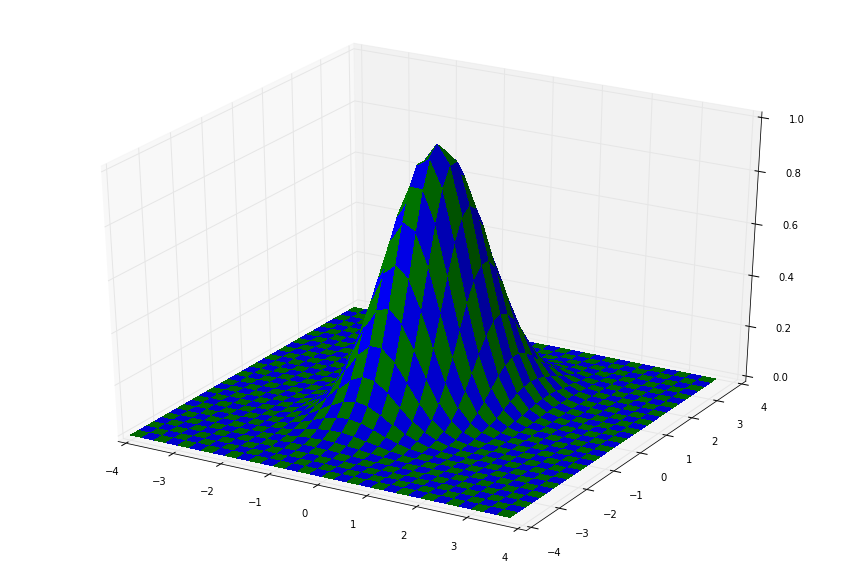

In [28]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la

u = np.matrix('0;0')
sigma = np.matrix('0.5 0.25;0.25 1')
c=1/((2*np.pi)*(la.det(sigma))**(0.5))

fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')
X1 = np.arange(-4, 4, 0.25)
x1_len = len(X1)
X2 = np.arange(-4, 4, 0.25)
x2_len = len(X2)
X1, X2 = np.meshgrid(X1, X2)
R = np.sqrt(X1**2 + X2**2)
Z = np.sin(R)

for i in range(len(X1)):
    for j in range(len(X2)):
        X = np.matrix([[X1[i,j]],[X2[i,j]]])
        Z[i,j]=np.exp(-0.5*(np.transpose(X-u))*la.inv(sigma)*(X-u))
    
colortuple = ('g', 'b')
colors = np.empty(X1.shape, dtype=str)
for y in range(x1_len):
    for x in range(x2_len):
        colors[x, y] = colortuple[(x + y) % len(colortuple)]

surf = ax.plot_surface(X1, X2, Z, rstride=1, cstride=1, facecolors=colors,
        linewidth=0, antialiased=False)

ax.set_zlim3d(0, 1)
ax.w_zaxis.set_major_locator(LinearLocator(6))
plt.show()

b. Genere $ N $ muestras aleatorias $(x_1,x_2,x_3,...,_x_n)$ (en MATLAB, se usa el comand mvnrnd).

Solucion:

In [29]:
N=100000
mean = np.array([0,0])
cov = np.array([[0.5,0.25],[0.25,1]])
X=np.random.multivariate_normal(mean, cov, N)


2 . Utilice los siguientes estimadores para $\hat{\mu}$ y $\hat{\Sigma}$, y compare contra $\mu$ y $\Sigma$.

Solucion:


In [30]:
mean_hat= np.mat(X.sum(axis=0)/X.shape[0])
Sigma_hat=0
for i in range(X.shape[0]):
    Sigma_hat+=(X[i]-mean_hat).transpose()*(X[i]-mean_hat)
Sigma_hat=Sigma_hat/X.shape[0]
print("calculo de mean hat :")
print(mean_hat)
print()
print("Calculo de Sigma hat: ")
print()
print(Sigma_hat)

calculo de mean hat :
[[-0.00080546 -0.00234551]]

Calculo de Sigma hat: 

[[ 0.49954601  0.25191717]
 [ 0.25191717  1.00269591]]



Concluciones :

Para calcular el promedio y la covariaza a partir de el muestreo aleatorio de una gaussiana, fue necesario incrementar el numero de muestras a valores superiores a 10K para que los valores se aproximara a los esperados.